/tmp/ipython-input-10-2973686295.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Will Purchase Again"] = (((df["Return Rate"] < 35) & (df["Popularity Index"] > 50)) |
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:00:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Model Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92    137461
           1       0.97      0.89      0.93    163993

    accuracy                           0.92    301454
   macro avg       0.92      0.93      0.92    301454
weighted avg       0.93      0.92      0.93    301454



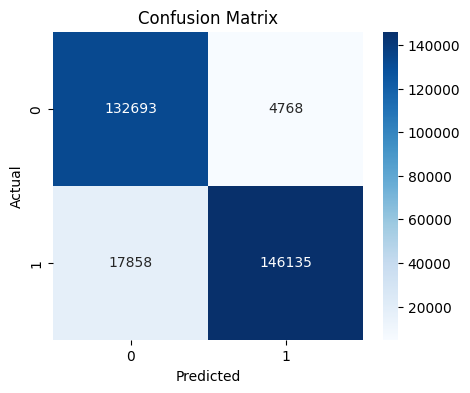

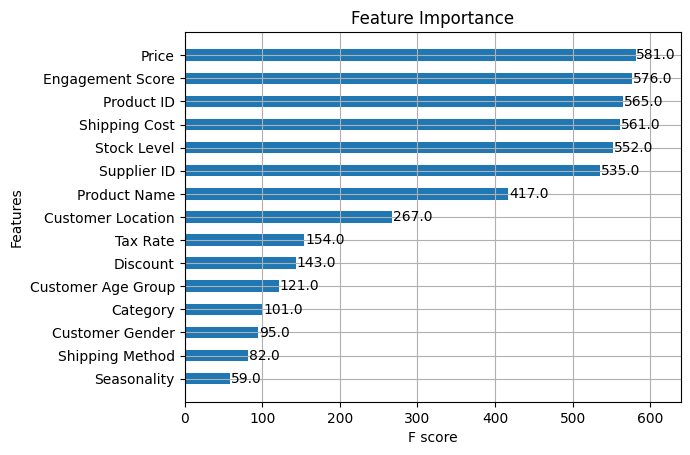

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb

df = pd.read_csv("/content/diversified_ecommerce_dataset.csv")
df = df.dropna()

np.random.seed(42)
df["Will Purchase Again"] = (((df["Return Rate"] < 35) & (df["Popularity Index"] > 50)) |
                             (np.random.rand(len(df)) > 0.90)).astype(int)

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

df["Engagement Score"] = (100 - df["Return Rate"]) * df["Popularity Index"]

X = df.drop(columns=["Will Purchase Again", "Return Rate", "Popularity Index"])
y = df["Will Purchase Again"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


xgb.plot_importance(model, height=0.5)
plt.title("Feature Importance")
plt.show()




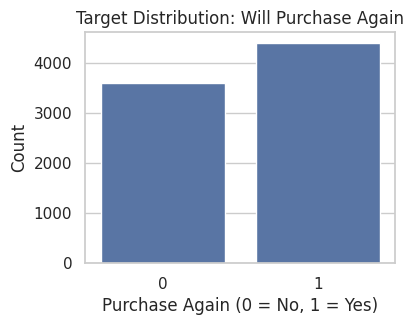

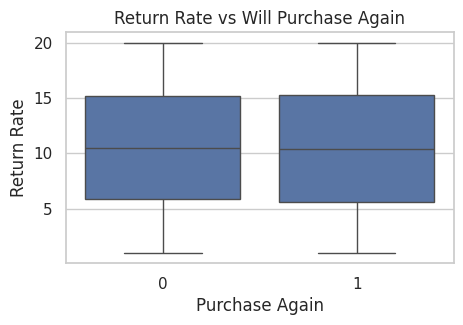

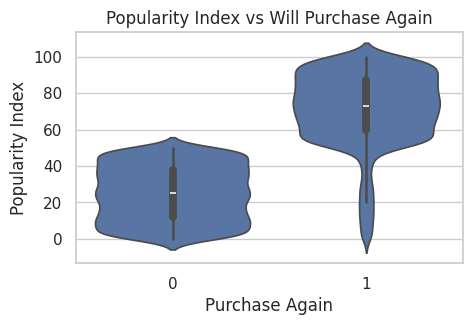

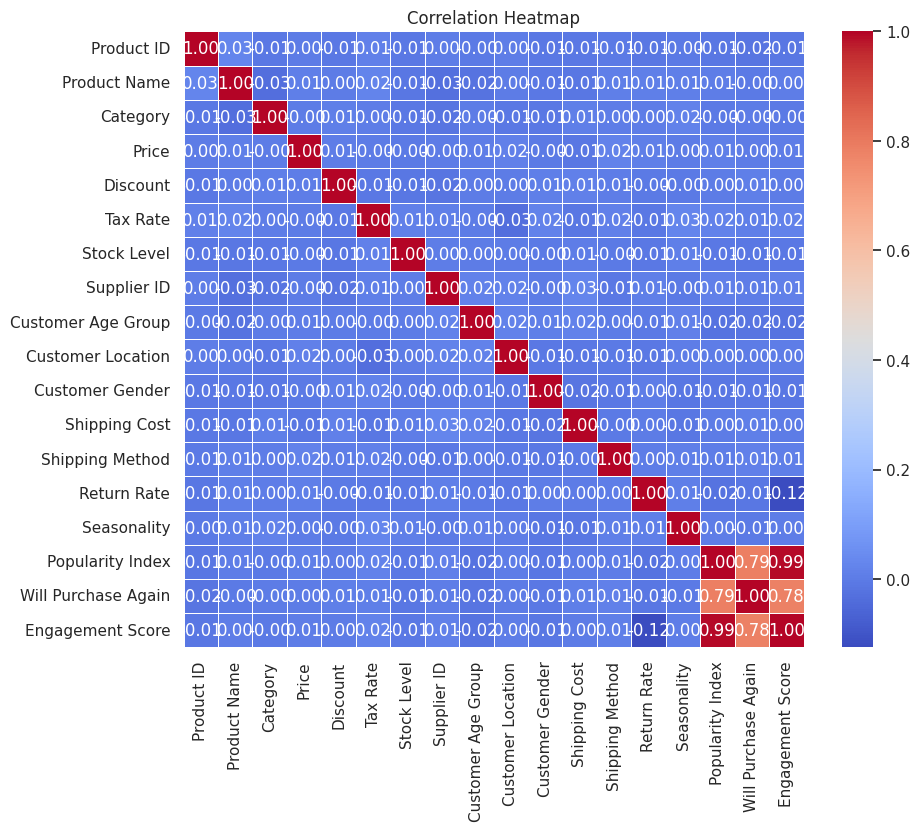

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# 1. 🎯 Target Distribution
plt.figure(figsize=(4,3))
sns.countplot(x="Will Purchase Again", data=df)
plt.title("Target Distribution: Will Purchase Again")
plt.xlabel("Purchase Again (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# 2. 📦 Boxplot: Return Rate vs Purchase Again
plt.figure(figsize=(5,3))
sns.boxplot(x="Will Purchase Again", y="Return Rate", data=df)
plt.title("Return Rate vs Will Purchase Again")
plt.xlabel("Purchase Again")
plt.ylabel("Return Rate")
plt.show()

# 3. 🎻 Violin Plot: Popularity Index vs Purchase Again
plt.figure(figsize=(5,3))
sns.violinplot(x="Will Purchase Again", y="Popularity Index", data=df)
plt.title("Popularity Index vs Will Purchase Again")
plt.xlabel("Purchase Again")
plt.ylabel("Popularity Index")
plt.show()

# 4. 🔥 Correlation Heatmap
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



In [ ]:

df.columns



Index(['Product ID', 'Product Name', 'Category', 'Price', 'Discount',
       'Tax Rate', 'Stock Level', 'Supplier ID', 'Customer Age Group',
       'Customer Location', 'Customer Gender', 'Shipping Cost',
       'Shipping Method', 'Return Rate', 'Seasonality', 'Popularity Index',
       'Will Purchase Again', 'Engagement Score'],
      dtype='object')

In [ ]:
df.head(15)

,Product ID,Product Name,Category,Price,Discount,Tax Rate,Stock Level,Supplier ID,Customer Age Group,Customer Location,Customer Gender,Shipping Cost,Shipping Method,Return Rate,Seasonality,Popularity Index,Will Purchase Again,Engagement Score
0,2496,20,1,1522.61,5,10,308,148,4,14,0,12.37,1,15.24,0,79,1,6696.04
1,689,7,4,1853.07,20,5,117,13,0,2,1,34.00,2,19.15,0,75,1,6063.75
2,2756,2,4,1089.70,15,12,368,467,1,14,2,22.95,1,17.55,0,69,1,5689.05
3,931,1,1,708.86,0,10,220,621,0,13,2,46.94,0,7.69,0,73,1,6738.63
4,3656,35,2,1010.11,25,5,455,511,0,0,1,24.42,2,12.58,1,73,1,6381.66
5,4159,39,1,72.02,10,15,479,281,4,14,1,1.12,1,6.52,0,38,0,3552.24
6,4192,40,4,1203.61,20,10,18,293,3,5,2,37.29,1,12.55,0,36,0,3148.20
7,3442,13,1,1757.67,0,10,437,48,0,2,2,29.34,1,7.56,1,10,0,924.40
8,3129,42,4,1150.72,0,5,270,710,3,9,1,2.79,1,6.19,1,26,0,2439.06
9,1269,41,4,909.82,0,15,24,483,0,3,2,19.53,2,18.54,0,36,0,2932.56


In [ ]:
# Basic information
print("DataFrame Shape:", df.shape)
df.info()
print(df.describe())

# Checking for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())
print("\nDuplicate rows:\n", df[df.duplicated()])

# Exploring unique values
print("\nUnique values in 'Category':", df['Category'].unique())
print("\nNumber of unique categories:", df['Category'].nunique())
print("\nFrequency of each category:\n", df['Category'].value_counts())

DataFrame Shape: (7999, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product ID           7999 non-null   int64  
 1   Product Name         7999 non-null   int64  
 2   Category             7999 non-null   int64  
 3   Price                7999 non-null   float64
 4   Discount             7999 non-null   int64  
 5   Tax Rate             7999 non-null   int64  
 6   Stock Level          7999 non-null   int64  
 7   Supplier ID          7999 non-null   int64  
 8   Customer Age Group   7999 non-null   int64  
 9   Customer Location    7999 non-null   int64  
 10  Customer Gender      7999 non-null   int64  
 11  Shipping Cost        7999 non-null   float64
 12  Shipping Method      7999 non-null   int64  
 13  Return Rate          7999 non-null   float64
 14  Seasonality          7999 non-null   int64  
 15  Popularity

In [ ]:
df.head()

,Product ID,Product Name,Category,Price,Discount,Tax Rate,Stock Level,Supplier ID,Customer Age Group,Customer Location,Customer Gender,Shipping Cost,Shipping Method,Return Rate,Seasonality,Popularity Index,Will Purchase Again,Engagement Score
0,2496,20,1,1522.61,5,10,308,148,4,14,0,12.37,1,15.24,0,79,1,6696.04
1,689,7,4,1853.07,20,5,117,13,0,2,1,34.00,2,19.15,0,75,1,6063.75
2,2756,2,4,1089.70,15,12,368,467,1,14,2,22.95,1,17.55,0,69,1,5689.05
3,931,1,1,708.86,0,10,220,621,0,13,2,46.94,0,7.69,0,73,1,6738.63
4,3656,35,2,1010.11,25,5,455,511,0,0,1,24.42,2,12.58,1,73,1,6381.66


In [ ]:
target = 'Will Purchase Again'


In [ ]:
X = df.drop(columns=[target])
y = df[target]


In [ ]:
from ipywidgets import interact, widgets

# Get the training features here, outside the function
training_features = model.get_booster().feature_names

def predict_interactive(**kwargs):
    input_data = pd.DataFrame([kwargs])

    # Ensure all necessary features are present
    missing_features = set(training_features) - set(input_data.columns)
    for feature in missing_features:
        # Use the mean value from the original data for missing features
        input_data[feature] = df[feature].mean()

    # Reorder columns to match training data
    input_data = input_data[training_features]

    prediction = model.predict(input_data)[0]
    print("🔮 Prediction:", "✅ Will Purchase Again" if prediction == 1 else "❌ Will Not Purchase Again")

# Build sliders for all features dynamically
interact_args = {}
for feature in training_features:
    if feature in df.select_dtypes(include=['number']).columns:
        f_min = df[feature].min()
        f_max = df[feature].max()
        if np.issubdtype(df[feature].dtype, np.integer):
            interact_args[feature] = widgets.IntSlider(min=f_min, max=f_max, step=1, value=(f_min + f_max) // 2, description=feature)
        else:
            interact_args[feature] = widgets.FloatSlider(min=f_min, max=f_max, step=0.1, value=(f_min + f_max) / 2, description=feature)
    else:
        # Handle categorical features
        unique_values = df[feature].unique()
        interact_args[feature] = widgets.Dropdown(options=unique_values, value=unique_values[0], description=feature)

interact(predict_interactive, **interact_args)

interactive(children=(IntSlider(value=2662, description='Product ID', max=5325), IntSlider(value=21, descripti…

<function __main__.predict_interactive(**kwargs)>